In [1]:
asdf=1

1

# El método de Newton

#[1]

####Esboza la geometría, tanto a mano como en la computadora, y así encuentra la expresión de $x_{n+1}$ en términos de $x_n$.

In [53]:
using PyPlot, AutoDif

Lo que hice fue ir graficando lo que iba escribiendo para tener una idea de qué estaba pasando

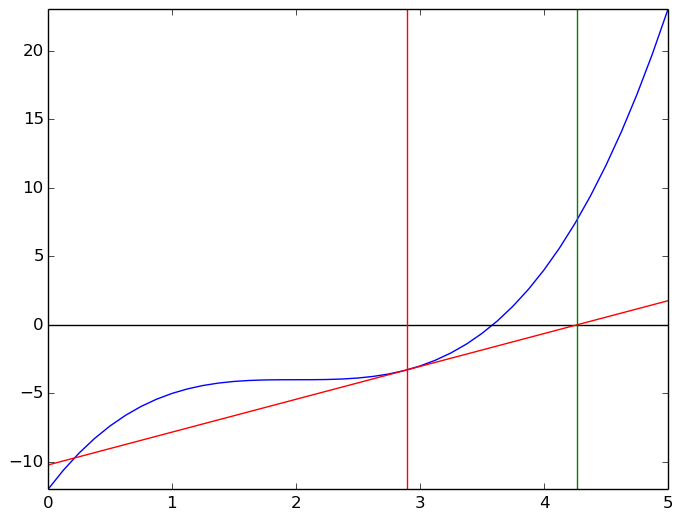

In [172]:
a=0
b=5
f(x)=(x-2)^3-4

x0=b*rand()
recta(x)= (f(ValorDeriv(x0)).deriv)*x  +  f(x0)-x0*f(ValorDeriv(x0)).deriv
x1=x0 - f(x0)/(f(ValorDeriv(x0)).deriv)


x=a:2.0^-3:b
y=similar(x)
y0=similar(x)

for i=1:length(x)
    y[i]=f(x[i])
    y0[i]=recta(x[i])
end

PyPlot.plot(x,y)
PyPlot.plot([a,b],zeros(2),"black")
PyPlot.plot(x0*[1,1],[f(a),f(b)],"red")
PyPlot.plot(x,y0,"red");
PyPlot.plot(x1*[1,1],[f(a),f(b)],"green")
PyPlot.xlim(a,b)
PyPlot.ylim(f(a),f(b));

Por lo tanto, dada una $x_n$ la expresión para $x_{n+1}$ es:

\begin{equation}
    x_{n+1}=x_n - \frac{f(x_n)}{f´(x_n)}
\end{equation}

#[2]
#### Implementa la iteración para calcular la raíz cuadrada y la raíz cúbica de 2. ¿Cuál es una condición razonable de terminación del algoritmo?

Estoy pidiendole al algoritmo que se detenga después de $100$ iteraciones o cuando la función tome un valor cuyo valor absoluto sea menor que $2.0^{-4}$

In [505]:
function cerosNewtonAux(f::Function,x,n::Int64)
    if n>100 
        return "Más de 100 iteraciones"
    elseif norm(f(x))<2.0^-30 #antes tenía abs() pero cambié a norm() para incluir arreglos
        return x
    else
        n+=1
        cerosNewtonAux(f,x - f(x)/(f(ValorDeriv(x)).deriv),n)
    end
end

cerosNewton(f::Function,x)=cerosNewtonAux(f::Function,x,1)

cerosNewton (generic function with 3 methods)

In [506]:
println(2^(1//3))
f(x)=x^3 - 2
cerosNewton(f,2)

1.2599210498948732


1.2599210498953948

In [507]:
println(2^(1//2))
f(x)=x^2 - 2
cerosNewton(f,2)

1.4142135623730951


1.4142135623746899

#[3]
#### Haz un módulo para llevar a cabo diferenciación automática (usando el código del notebook correspondiente) y utilízalo para implementar el método.

...lo había hecho así desde el principio. El módulo se llama `AutoDif` y permite usar el tipo `ValorDeriv` definido en el notebook 6. Este módulo al igual que todos los que he creado están en la carpeta `MisModulos`

#[4]
####Utiliza el mismo método para la función compleja $f(z)=z^3−1$. Empezando desde distintos números complejos $a+bi$, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Para esto, se recomienda construir una matriz y utilizar la función pcolor de PyPlot.

Primero pruebo qué hacen mis programas a números complejos:

In [508]:
f(x)=x^3 - 1
println(cerosNewton(f,Complex(1,0)/sqrt(2))) #elegí como puntos iniciales complejos unitarios
println(cerosNewton(f,Complex( -1,1 )/sqrt(2)))
println(cerosNewton(f,Complex( -1,-1 )/sqrt(2)))

1.0000000000000042 + 0.0im
-0.5 + 0.8660254037844387im
-0.5 - 0.8660254037844387im


Parece que funcionan bastante bien O.O

Lo que haré ahora es crear una matriz de unos y cada que una raíz no converga convertiré esa entrada en cero

0.0 + 0.0im


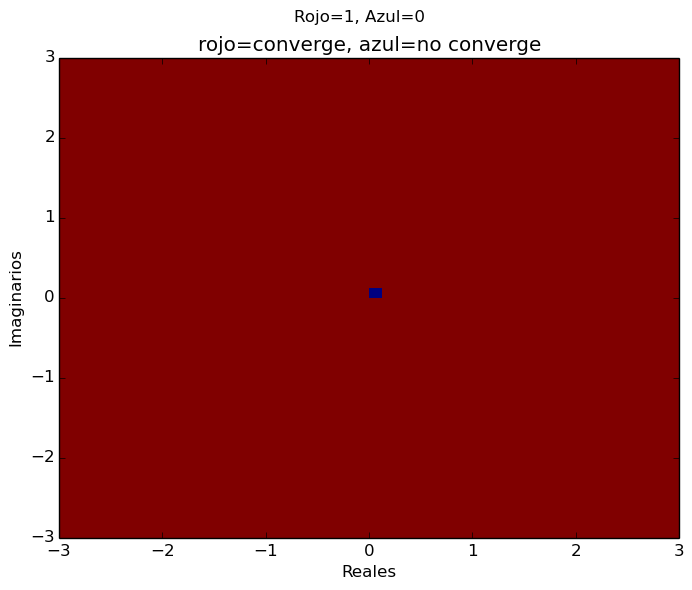

In [509]:
paso=2.0^-3
a=-3
b=3-paso # le quito un elemento ya que pcolor grafica cuadrantes, lo que quiere
        # decir que la matriz z debe tener un elemento menos que los arreglos x,y
        # Nótese que esto quiere decir que nos falta una columna de info
x=Float64[a:paso:b]
y=Float64[a:paso:b]
n=length(x)
z=ones(n,n);
for i=1:n
    for j=1:n
        if typeof(  cerosNewton(f,Complex(x[i],y[j]))  ) == UTF8String
            println(Complex(x[i],y[j])) # imprimo valores en los que no converge
            z[j,i]=0 #es j,i porque en matrices se usa que (renglón, columna) y yo lo quiero al revés
        end
    end
end

push!(x,b+paso)
push!(y,b+paso)

PyPlot.pcolor(x,y,z)
PyPlot.xlabel("Reales")
PyPlot.ylabel("Imaginarios")
PyPlot.suptitle("Rojo=1, Azul=0")
PyPlot.title("rojo=converge, azul=no converge");

Es decir que el único valor que no converge es el cero, lo cual tiene sentido ya que la derivada de la función $f(x)=x^3 - 1$ evaluada en cero es igual a cero, por lo que el término $x_{n+1}$ diverge (ver ejercicio [1])

# Dimensión superior

#[5]
#### Desarrolla e implementa el método de Newton para funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$. Para hacerlo, toma una adivinaza $\mathbf{x}_n$ y resuelve la ecuación $\mathbf{f}(\mathbf{x}_{n+1})=\mathbf{0}$, con $\mathbf{x}_{n+1}=\mathbf{x}_n+δ\mathbf{x}_n$.

Lo dejo comentado pa ver si jala sin restringir tipo de x

function cerosNewtonAux(f::Function,x::Array{Float64,1},n::Int64)
    if n>100 
        return "Más de 100 iteraciones"
    elseif norm(f(x))<2.0^-30
        return x
    else
        n+=1
        cerosNewtonAux(f,x - f(x)/(f(ValorDeriv(x)).deriv),n)
    end
end

cerosNewton(f::Function,x::Array{Float64,1})=cerosNewtonAux(f,x,1)

In [510]:
ff(x)=x #Float64[]

ff (generic function with 1 method)

In [511]:
cerosNewton(ff,Float64[4,1])

2-element Array{Float64,1}:
 0.0
 0.0

In [504]:
norm(Float64[12.2,4,1])
norm(Complex(1/2,1/2))

0.7071067811865476

#[6]
####Utiliza tu algoritmo para calcular raíces de funciones conocidas multidimensionales.